distx = Exponential(1) = Exponential{Float64}(θ=1.0)
disty = Exponential(2) - 1 = LocationScale{Float64, Continuous, Exponential{Float64}}(
μ: -1.0
σ: 1.0
ρ: Exponential{Float64}(θ=2.0)
)

m = 20
n = 30
Niters = 1000000


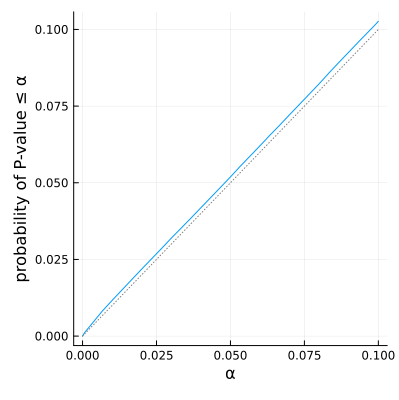

In [1]:
using Distributions
using HypothesisTests
using StatsPlots
default(fmt=:png)
ecdf(A, x) = count(≤(x), A)/length(A)

@show distx = Exponential(1)
@show disty = Exponential(2) - 1
m, n = 20, 30
Niters = 10^6
@show m n Niters
pval = [pvalue(UnequalVarianceTTest(rand(distx, m), rand(disty, n))) for _ in 1:Niters]
plot(α -> ecdf(pval, α), 0, 0.1; label="")
plot!(identity; label="", ls=:dot, c=:gray)
plot!(xguide="α", yguide="probability of P-value ≤ α", size=(400, 400))

distx = Bernoulli(0.3) = Bernoulli{Float64}(p=0.3)
disty = Bernoulli(0.3) = Bernoulli{Float64}(p=0.3)
m = 20
n = 30
Niters = 1000000


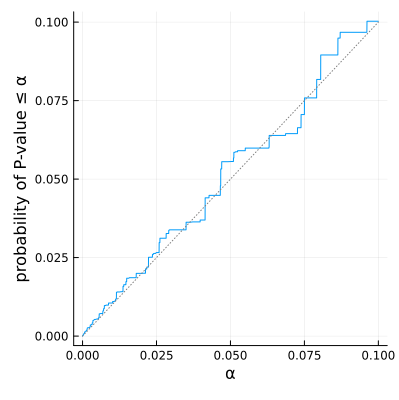

In [2]:
using Distributions
using HypothesisTests
using StatsPlots
default(fmt=:png)
ecdf(A, x) = count(≤(x), A)/length(A)

@show distx = Bernoulli(0.3)
@show disty = Bernoulli(0.3)
m, n = 20, 30
Niters = 10^6
@show m n Niters
pval = [pvalue(UnequalVarianceTTest(rand(distx, m), rand(disty, n))) for _ in 1:Niters]
plot(α -> ecdf(pval, α), 0, 0.1; label="")
plot!(identity; label="", ls=:dot, c=:gray)
plot!(xguide="α", yguide="probability of P-value ≤ α", size=(400, 400))

distx = Binomial(m, 0.3) = Binomial{Float64}(n=20, p=0.3)
disty = Binomial(n, 0.3) = Binomial{Float64}(n=30, p=0.3)
Niters = 100000


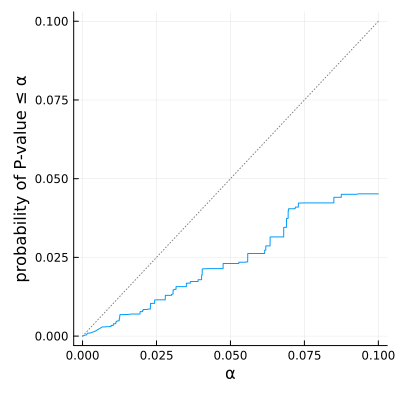

In [3]:
using Distributions
using HypothesisTests
using StatsPlots
default(fmt=:png)
ecdf(A, x) = count(≤(x), A)/length(A)

m, n = 20, 30
@show distx = Binomial(m, 0.3)
@show disty = Binomial(n, 0.3)
Niters = 10^5
@show Niters
pval1 = [(
            a = rand(distx); b = m - a;
            c = rand(disty); d = n - c;
            pvalue(FisherExactTest(a, b, c, d); method=:central)
        ) for _ in 1:Niters]
plot(α -> ecdf(pval1, α), 0, 0.1; label="")
plot!(identity; label="", ls=:dot, c=:gray)
plot!(xguide="α", yguide="probability of P-value ≤ α", size=(400, 400))

distx = Binomial(m, 0.3) = Binomial{Float64}(n=20, p=0.3)
disty = Binomial(n, 0.3) = Binomial{Float64}(n=30, p=0.3)
Niters = 100000


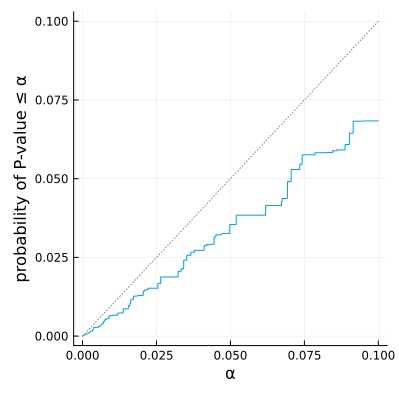

In [4]:
using Distributions
using HypothesisTests
using StatsPlots
default(fmt=:png)
ecdf(A, x) = count(≤(x), A)/length(A)

m, n = 20, 30
@show distx = Binomial(m, 0.3)
@show disty = Binomial(n, 0.3)
Niters = 10^5
@show Niters
pval2 = [(
            a = rand(distx); b = m - a;
            c = rand(disty); d = n - c;
            pvalue(FisherExactTest(a, b, c, d); method=:minlike)
        ) for _ in 1:Niters]
plot(α -> ecdf(pval2, α), 0, 0.1; label="")
plot!(identity; label="", ls=:dot, c=:gray)
plot!(xguide="α", yguide="probability of P-value ≤ α", size=(400, 400))

distx = Binomial(m, 0.3) = Binomial{Float64}(n=20, p=0.3)
disty = Binomial(n, 0.3) = Binomial{Float64}(n=30, p=0.3)
Niters = 100000
  5.470160 seconds (8.36 M allocations: 2.428 GiB, 9.26% gc time, 48.15% compilation time)


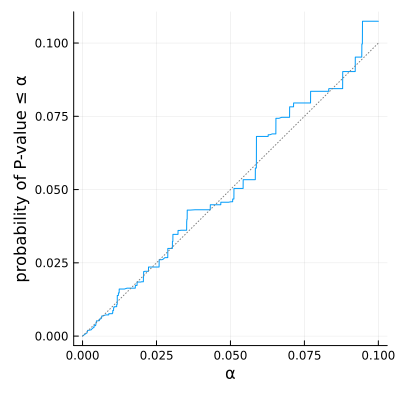

In [5]:
using Distributions
using HypothesisTests
using StatsPlots
default(fmt=:png)
ecdf(A, x) = count(≤(x), A)/length(A)

m, n = 20, 30
@show distx = Binomial(m, 0.3)
@show disty = Binomial(n, 0.3)
Niters = 10^5
@show Niters
@time pval3 = [(
            a = rand(distx); b = m - a;
            c = rand(disty); d = n - c;
            pvalue(ChisqTest([a b; c d]))
        ) for _ in 1:Niters]
plot(α -> ecdf(pval3, α), 0, 0.1; label="")
plot!(identity; label="", ls=:dot, c=:gray)
plot!(xguide="α", yguide="probability of P-value ≤ α", size=(400, 400))

distx = Binomial(m, 0.3) = Binomial{Float64}(n=20, p=0.3)
disty = Binomial(n, 0.3) = Binomial{Float64}(n=30, p=0.3)
Niters = 100000
  1.394785 seconds (2.45 M allocations: 186.061 MiB, 6.66% gc time, 91.08% compilation time)


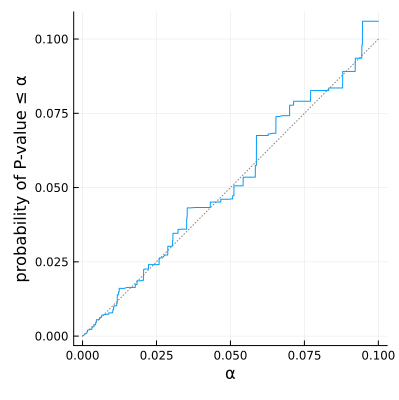

In [6]:
using Distributions
using HypothesisTests
using StaticArrays
using StatsPlots
default(fmt=:png)
ecdf(A, x) = count(≤(x), A)/length(A)

m, n = 20, 30
@show distx = Binomial(m, 0.3)
@show disty = Binomial(n, 0.3)
Niters = 10^5
@show Niters
@time pval3 = [(
            a = rand(distx); b = m - a;
            c = rand(disty); d = n - c;
            pvalue(ChisqTest(@SMatrix [a b; c d]))
        ) for _ in 1:Niters]
plot(α -> ecdf(pval3, α), 0, 0.1; label="")
plot!(identity; label="", ls=:dot, c=:gray)
plot!(xguide="α", yguide="probability of P-value ≤ α", size=(400, 400))

distx = Binomial(m, 0.3) = Binomial{Float64}(n=20, p=0.3)
disty = Binomial(n, 0.3) = Binomial{Float64}(n=30, p=0.3)
Niters = 100000
  0.192091 seconds (498.56 k allocations: 21.204 MiB, 71.74% compilation time)


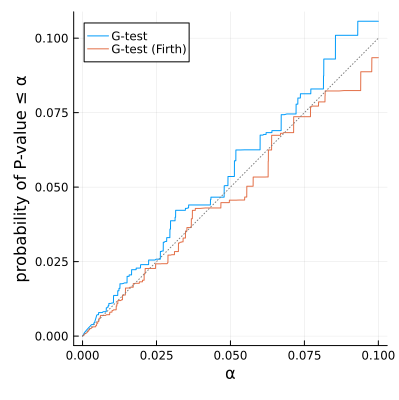

In [7]:
using Distributions
using StatsPlots
default(fmt=:png)
ecdf(A, x) = count(≤(x), A)/length(A)

safemul(x, y) = x == 0 ? zero(x*y) : x*y
safediv(x, y) = x == 0 ? zero(x/y) : x/y

# See also https://github.com/genkuroki/public/blob/main/0047/Pearson%20%CF%87%C2%B2-test%20vs.%20G-test%20with%20Firth%20correction.ipynb

function _gstat_or(a, b, c, d)
    N = a + b + c + d
    ã, b̃, c̃, d̃ = (a+b)*(a+c)/N, (a+b)*(b+d)/N, (c+d)*(a+c)/N, (c+d)*(b+d)/N
    2(
        safemul(a, log(safediv(a, ã))) +
        safemul(b, log(safediv(b, b̃))) +
        safemul(c, log(safediv(c, c̃))) +
        safemul(d, log(safediv(d, d̃)))
    )
end

function pvalue_gtest(a, b, c, d; firth=false)
    G = _gstat_or(a+0.5firth, b+0.5firth, c+0.5firth, d+0.5firth)
    ccdf(Chisq(1), G)
end

m, n = 20, 30
@show distx = Binomial(m, 0.3)
@show disty = Binomial(n, 0.3)
Niters = 10^5
@show Niters
@time pval45 = [(
            a = rand(distx); b = m - a;
            c = rand(disty); d = n - c;
            (pvalue_gtest(a, b, c, d), pvalue_gtest(a, b, c, d; firth=true))
        ) for _ in 1:Niters]
pval4 = getindex.(pval45, 1)
pval5 = getindex.(pval45, 2)
plot(α -> ecdf(pval4, α), 0, 0.1; label="G-test")
plot!(α -> ecdf(pval5, α), 0, 0.1; label="G-test (Firth)")
plot!(identity; label="", ls=:dot, c=:gray)
plot!(xguide="α", yguide="probability of P-value ≤ α", size=(400, 400))

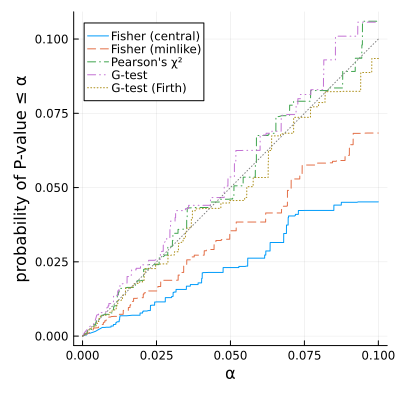

In [8]:
plot(α -> ecdf(pval1, α), 0, 0.1; label="Fisher (central)")
plot!(α -> ecdf(pval2, α); label="Fisher (minlike)", ls=:dash)
plot!(α -> ecdf(pval3, α); label="Pearson's χ²", ls=:dashdot)
plot!(α -> ecdf(pval4, α); label="G-test", ls=:dashdotdot)
plot!(α -> ecdf(pval5, α); label="G-test (Firth)", ls=:dot)
plot!(identity; label="", ls=:dot, c=:gray)
plot!(xguide="α", yguide="probability of P-value ≤ α", size=(400, 400))

distx = Binomial(m, p) = Binomial{Float64}(n=20, p=0.3)
disty = Binomial(n, q) = Binomial{Float64}(n=30, p=0.3)
Niters = 100000


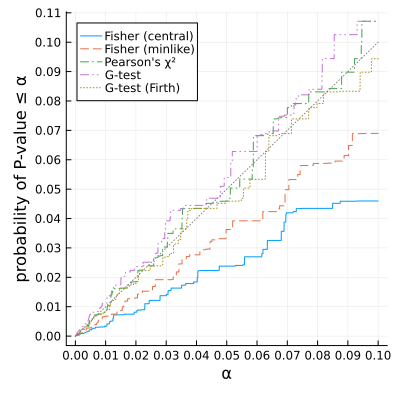

In [9]:
using Distributions
using HypothesisTests
using StaticArrays
using StatsPlots
default(fmt=:png)
ecdf(A, x) = count(≤(x), A)/length(A)

safemul(x, y) = x == 0 ? zero(x*y) : x*y
safediv(x, y) = x == 0 ? zero(x/y) : x/y

function _gstat_or(a, b, c, d)
    N = a + b + c + d
    ã, b̃, c̃, d̃ = (a+b)*(a+c)/N, (a+b)*(b+d)/N, (c+d)*(a+c)/N, (c+d)*(b+d)/N
    2(
        safemul(a, log(safediv(a, ã))) +
        safemul(b, log(safediv(b, b̃))) +
        safemul(c, log(safediv(c, c̃))) +
        safemul(d, log(safediv(d, d̃)))
    )
end

function pvalue_gtest(a, b, c, d; firth=false)
    G = _gstat_or(a+0.5firth, b+0.5firth, c+0.5firth, d+0.5firth)
    ccdf(Chisq(1), G)
end

function plot_sim(; m=20, n=30, p=0.3, q=0.3, Niters=10^5, ytick=0:0.01:1, kwargs...)
    @show distx = Binomial(m, p)
    @show disty = Binomial(n, q)
    @show Niters
    pval1 = zeros(Niters)
    pval2 = zeros(Niters)
    pval3 = zeros(Niters)
    pval4 = zeros(Niters)
    pval5 = zeros(Niters)
    Threads.@threads for i in 1:Niters
        a = rand(distx)
        b = m - a
        c = rand(disty)
        d = n - c
        pval1[i] = pvalue(FisherExactTest(a, b, c, d); method=:central)
        pval2[i] = pvalue(FisherExactTest(a, b, c, d); method=:minlike)
        pval3[i] = pvalue(ChisqTest(@SMatrix [a b; c d]))
        pval4[i] = pvalue_gtest(a, b, c, d)
        pval5[i] = pvalue_gtest(a, b, c, d; firth=true)
    end
    plot(α -> ecdf(pval1, α), 0, 0.1; label="Fisher (central)")
    plot!(α -> ecdf(pval2, α); label="Fisher (minlike)", ls=:dash)
    plot!(α -> ecdf(pval3, α); label="Pearson's χ²", ls=:dashdot)
    plot!(α -> ecdf(pval4, α); label="G-test", ls=:dashdotdot)
    plot!(α -> ecdf(pval5, α); label="G-test (Firth)", ls=:dot)
    plot!(identity; label="", ls=:dot, c=:gray)
    plot!(; xguide="α", yguide="probability of P-value ≤ α")
    plot!(; xtick=0:0.01:1, ytick)
    plot!(; size=(400, 400), kwargs...)
end

plot_sim(; m=20, n=30, p=0.3, q=0.3)

distx = Binomial(m, p) = Binomial{Float64}(n=20, p=0.2)
disty = Binomial(n, q) = Binomial{Float64}(n=30, p=0.5)
Niters = 100000


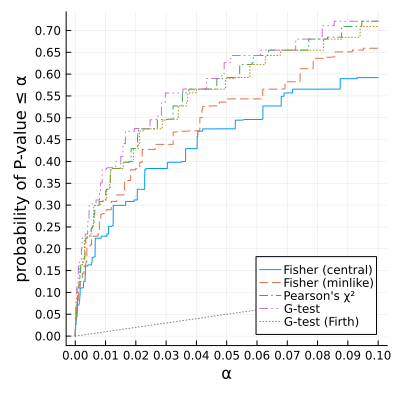

In [10]:
plot_sim(; m=20, n=30, p=0.2, q=0.5, ytick=0:0.05:1, legend=:bottomright)

distx = Binomial(m, p) = Binomial{Float64}(n=10, p=0.2)
disty = Binomial(n, q) = Binomial{Float64}(n=40, p=0.2)
Niters = 100000


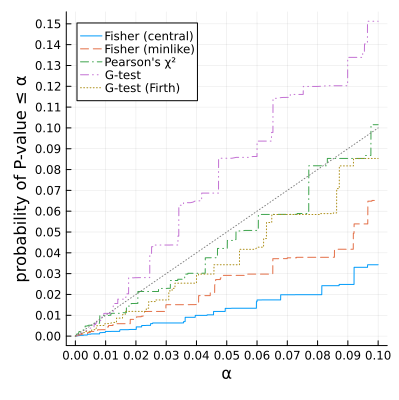

In [11]:
plot_sim(; m=10, n=40, p=0.2, q=0.2)

distx = Binomial(m, p) = Binomial{Float64}(n=5, p=0.35)
disty = Binomial(n, q) = Binomial{Float64}(n=45, p=0.35)
Niters = 100000


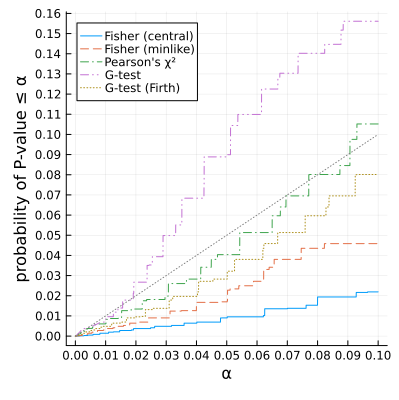

In [12]:
plot_sim(; m=5, n=45, p=0.35, q=0.35)

distx = Binomial(m, p) = Binomial{Float64}(n=10, p=0.15)
disty = Binomial(n, q) = Binomial{Float64}(n=15, p=0.15)
Niters = 100000


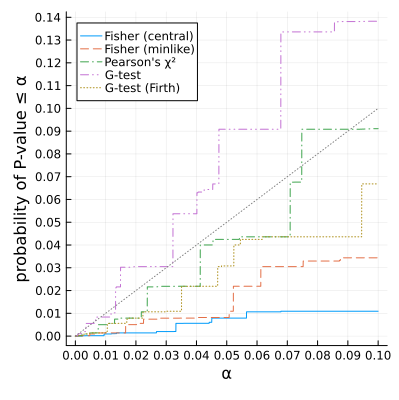

In [13]:
plot_sim(; m=10, n=15, p=0.15, q=0.15)